In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
#import hvplot.dask
from sklearn import linear_model
#import pandas.stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.neural_network import MLPClassifier

from datetime import datetime

import seaborn as sns


#import graphviz


In [2]:
df = dd.read_csv('US_Accidents_March23.csv') 
df.head()




,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
sample=df.sample(frac=0.005)


workable = sample.compute()


In [4]:
#=df.sample(frac=0.05)
#workable2=sample.compute()

In [5]:
workable.count()

ID                       38641
Source                   38641
Severity                 38641
Start_Time               38641
End_Time                 38641
Start_Lat                38641
Start_Lng                38641
End_Lat                  21611
End_Lng                  21611
Distance(mi)             38641
Description              38641
Street                   38588
City                     38639
County                   38641
State                    38641
Zipcode                  38626
Country                  38641
Timezone                 38588
Airport_Code             38515
Weather_Timestamp        38031
Temperature(F)           37826
Wind_Chill(F)            28618
Humidity(%)              37770
Pressure(in)             37928
Visibility(mi)           37752
Wind_Direction           37749
Wind_Speed(mph)          35757
Precipitation(in)        27620
Weather_Condition        37774
Amenity                  38641
Bump                     38641
Crossing                 38641
Give_Way

In [6]:
print(df.columns)
#print(len(df))


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [7]:


severity_counts = df["Severity"]

severity_counts = severity_counts.value_counts()








<BarContainer object of 4 artists>

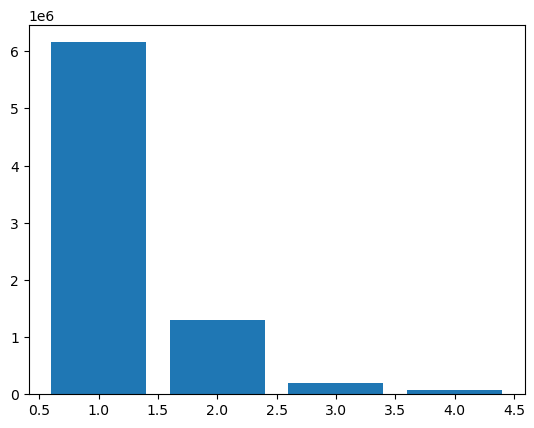

In [8]:
plt.bar([1, 2, 3, 4], severity_counts)

In [9]:


back_to_the_past = pd.DataFrame()

#back_to_the_past = 

In [10]:
data = {'fruit': ['apple', 'orange', 'banana', 'apple', 'orange']}
df = pd.DataFrame(data)

# use value_counts() to count occurrences of 'apple'
count = df['fruit'].value_counts()['apple']

print(f"The number of apples is: {count}")

The number of apples is: 2


In [11]:
#sample_preportion = len(sample)/7728394
severity_grouped = sample.groupby(by=["Severity"])

display(severity_grouped["Severity"])

#plt.bar([1,2,3], severity_grouped["Severity"])

In [12]:
#print(sample_preportion)

In [13]:
workable.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
73862,A-73869,Source2,3,2016-11-21 05:34:43,2016-11-21 06:10:00,34.028236,-118.229942,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Day,Day
48643,A-48644,Source2,2,2016-07-14 02:42:18,2016-07-14 03:42:18,34.173260,-118.553490,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Night,Night
24459,A-24460,Source2,3,2016-10-14 15:42:28,2016-10-14 16:30:00,37.912777,-122.066925,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
7446,A-7447,Source2,3,2016-12-16 15:49:40,2016-12-16 16:19:40,37.635273,-122.439209,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
138104,A-138111,Source2,2,2016-08-18 18:28:05,2016-08-18 19:28:05,28.447748,-81.264236,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day


In [14]:
workable["Severity"]

73862     3
48643     2
24459     3
7446      3
138104    2
         ..
172637    2
58059     3
39397     2
85802     2
116066    2
Name: Severity, Length: 38641, dtype: int64

In [15]:
severityValueCounts = workable["Severity"].value_counts()
severityValueCounts = severityValueCounts.sort_index()
severityValueCounts

1      365
2    30800
3     6505
4      971
Name: Severity, dtype: int64

Text(0.5, 0, 'Severity Level')

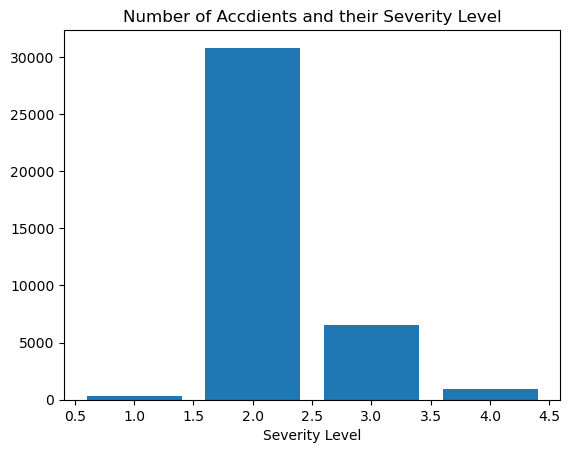

In [185]:
plt.bar([1,2,3,4], severityValueCounts)
plt.title("Number of Accdients and their Severity Level")
plt.xlabel("Severity Level")
plt.ylabel("Count")

In [17]:
time_to_rating_df = workable.sort_values(["Severity"], ascending=False)
time_to_rating_df = time_to_rating_df[["Severity", "Start_Time", "End_Time"]]
time_to_rating_df

,Severity,Start_Time,End_Time
139527,4,2019-09-21 15:51:00,2019-09-21 16:19:50
127416,4,2019-11-13 11:02:49,2019-11-13 16:02:23
44744,4,2020-10-17 00:17:00,2020-10-17 01:40:04
33279,4,2021-04-22 17:14:00,2021-04-22 19:38:24
2651,4,2020-07-21 16:44:38,2020-07-21 17:59:06
...,...,...,...
35425,1,2022-07-20 08:26:11,2022-07-20 09:11:36
11948,1,2022-08-16 08:27:12,2022-08-16 09:12:25
3931,1,2022-08-25 08:14:26,2022-08-25 08:44:15
50972,1,2022-07-01 07:41:26,2022-07-01 08:41:15


In [18]:


time_to_rating_df["Start_Date"] = time_to_rating_df["Start_Time"].apply(lambda row: row.split()[0])
time_to_rating_df["Start_Time_Only"] = time_to_rating_df["Start_Time"].apply(lambda row: row.split()[1])

time_to_rating_df["End_Date"] = time_to_rating_df["End_Time"].apply(lambda row: row.split()[0])
time_to_rating_df["End_Time_Only"] = time_to_rating_df["End_Time"].apply(lambda row: row.split()[1])

time_to_rating_df

,Severity,Start_Time,End_Time,Start_Date,Start_Time_Only,End_Date,End_Time_Only
139527,4,2019-09-21 15:51:00,2019-09-21 16:19:50,2019-09-21,15:51:00,2019-09-21,16:19:50
127416,4,2019-11-13 11:02:49,2019-11-13 16:02:23,2019-11-13,11:02:49,2019-11-13,16:02:23
44744,4,2020-10-17 00:17:00,2020-10-17 01:40:04,2020-10-17,00:17:00,2020-10-17,01:40:04
33279,4,2021-04-22 17:14:00,2021-04-22 19:38:24,2021-04-22,17:14:00,2021-04-22,19:38:24
2651,4,2020-07-21 16:44:38,2020-07-21 17:59:06,2020-07-21,16:44:38,2020-07-21,17:59:06
...,...,...,...,...,...,...,...
35425,1,2022-07-20 08:26:11,2022-07-20 09:11:36,2022-07-20,08:26:11,2022-07-20,09:11:36
11948,1,2022-08-16 08:27:12,2022-08-16 09:12:25,2022-08-16,08:27:12,2022-08-16,09:12:25
3931,1,2022-08-25 08:14:26,2022-08-25 08:44:15,2022-08-25,08:14:26,2022-08-25,08:44:15
50972,1,2022-07-01 07:41:26,2022-07-01 08:41:15,2022-07-01,07:41:26,2022-07-01,08:41:15


In [19]:
import statsmodels.formula.api as sm
test2 = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
result = sm.ols(formula="A ~ B + C", data=test2).fit()
print(result.params)
print(result.summary())
print(workable.columns)
test2

Intercept    14.952480
B             0.401182
C             0.000352
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.375
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.421
Time:                        18:56:33   Log-Likelihood:                -18.178
No. Observations:                   5   AIC:                             42.36
Df Residuals:                       2   BIC:                             41.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,A,B,C
0,10,20,32
1,20,30,234
2,30,10,23
3,40,40,23
4,50,50,42523


In [20]:
roadFeaturesToSeverity = sm.ols(formula="Severity ~ Amenity + Bump + Crossing + Give_Way + Junction + No_Exit + Railway + Roundabout + Station + Stop + Traffic_Calming + Traffic_Signal + Turning_Loop", data=workable).fit()
print(roadFeaturesToSeverity.params)
print(roadFeaturesToSeverity.summary())

Intercept                  2.234884e+00
Amenity[T.True]           -4.516944e-02
Bump[T.True]              -7.497499e-02
Crossing[T.True]          -1.009941e-01
Give_Way[T.True]           6.078702e-04
Junction[T.True]           6.090783e-02
No_Exit[T.True]           -2.952884e-02
Railway[T.True]            4.401142e-02
Roundabout[T.True]        -6.072534e-17
Station[T.True]           -6.936764e-02
Stop[T.True]              -1.093171e-01
Traffic_Calming[T.True]    3.673672e-02
Traffic_Signal[T.True]    -9.374823e-02
Turning_Loop[T.True]       0.000000e+00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     67.17
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.66e-150
Time:                        1

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [22]:
features = ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']

X = workable[features]
y = workable.Severity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtc = DecisionTreeClassifier(criterion="entropy")
dtc = dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7960838436987837


In [23]:
#print(y)

In [24]:
from sklearn.tree import export_graphviz
from sklearn import tree
export_graphviz(dtc, 'tree.dot', feature_names = features)



In [25]:
#! dot -Tpng tree.dot -o tree.png

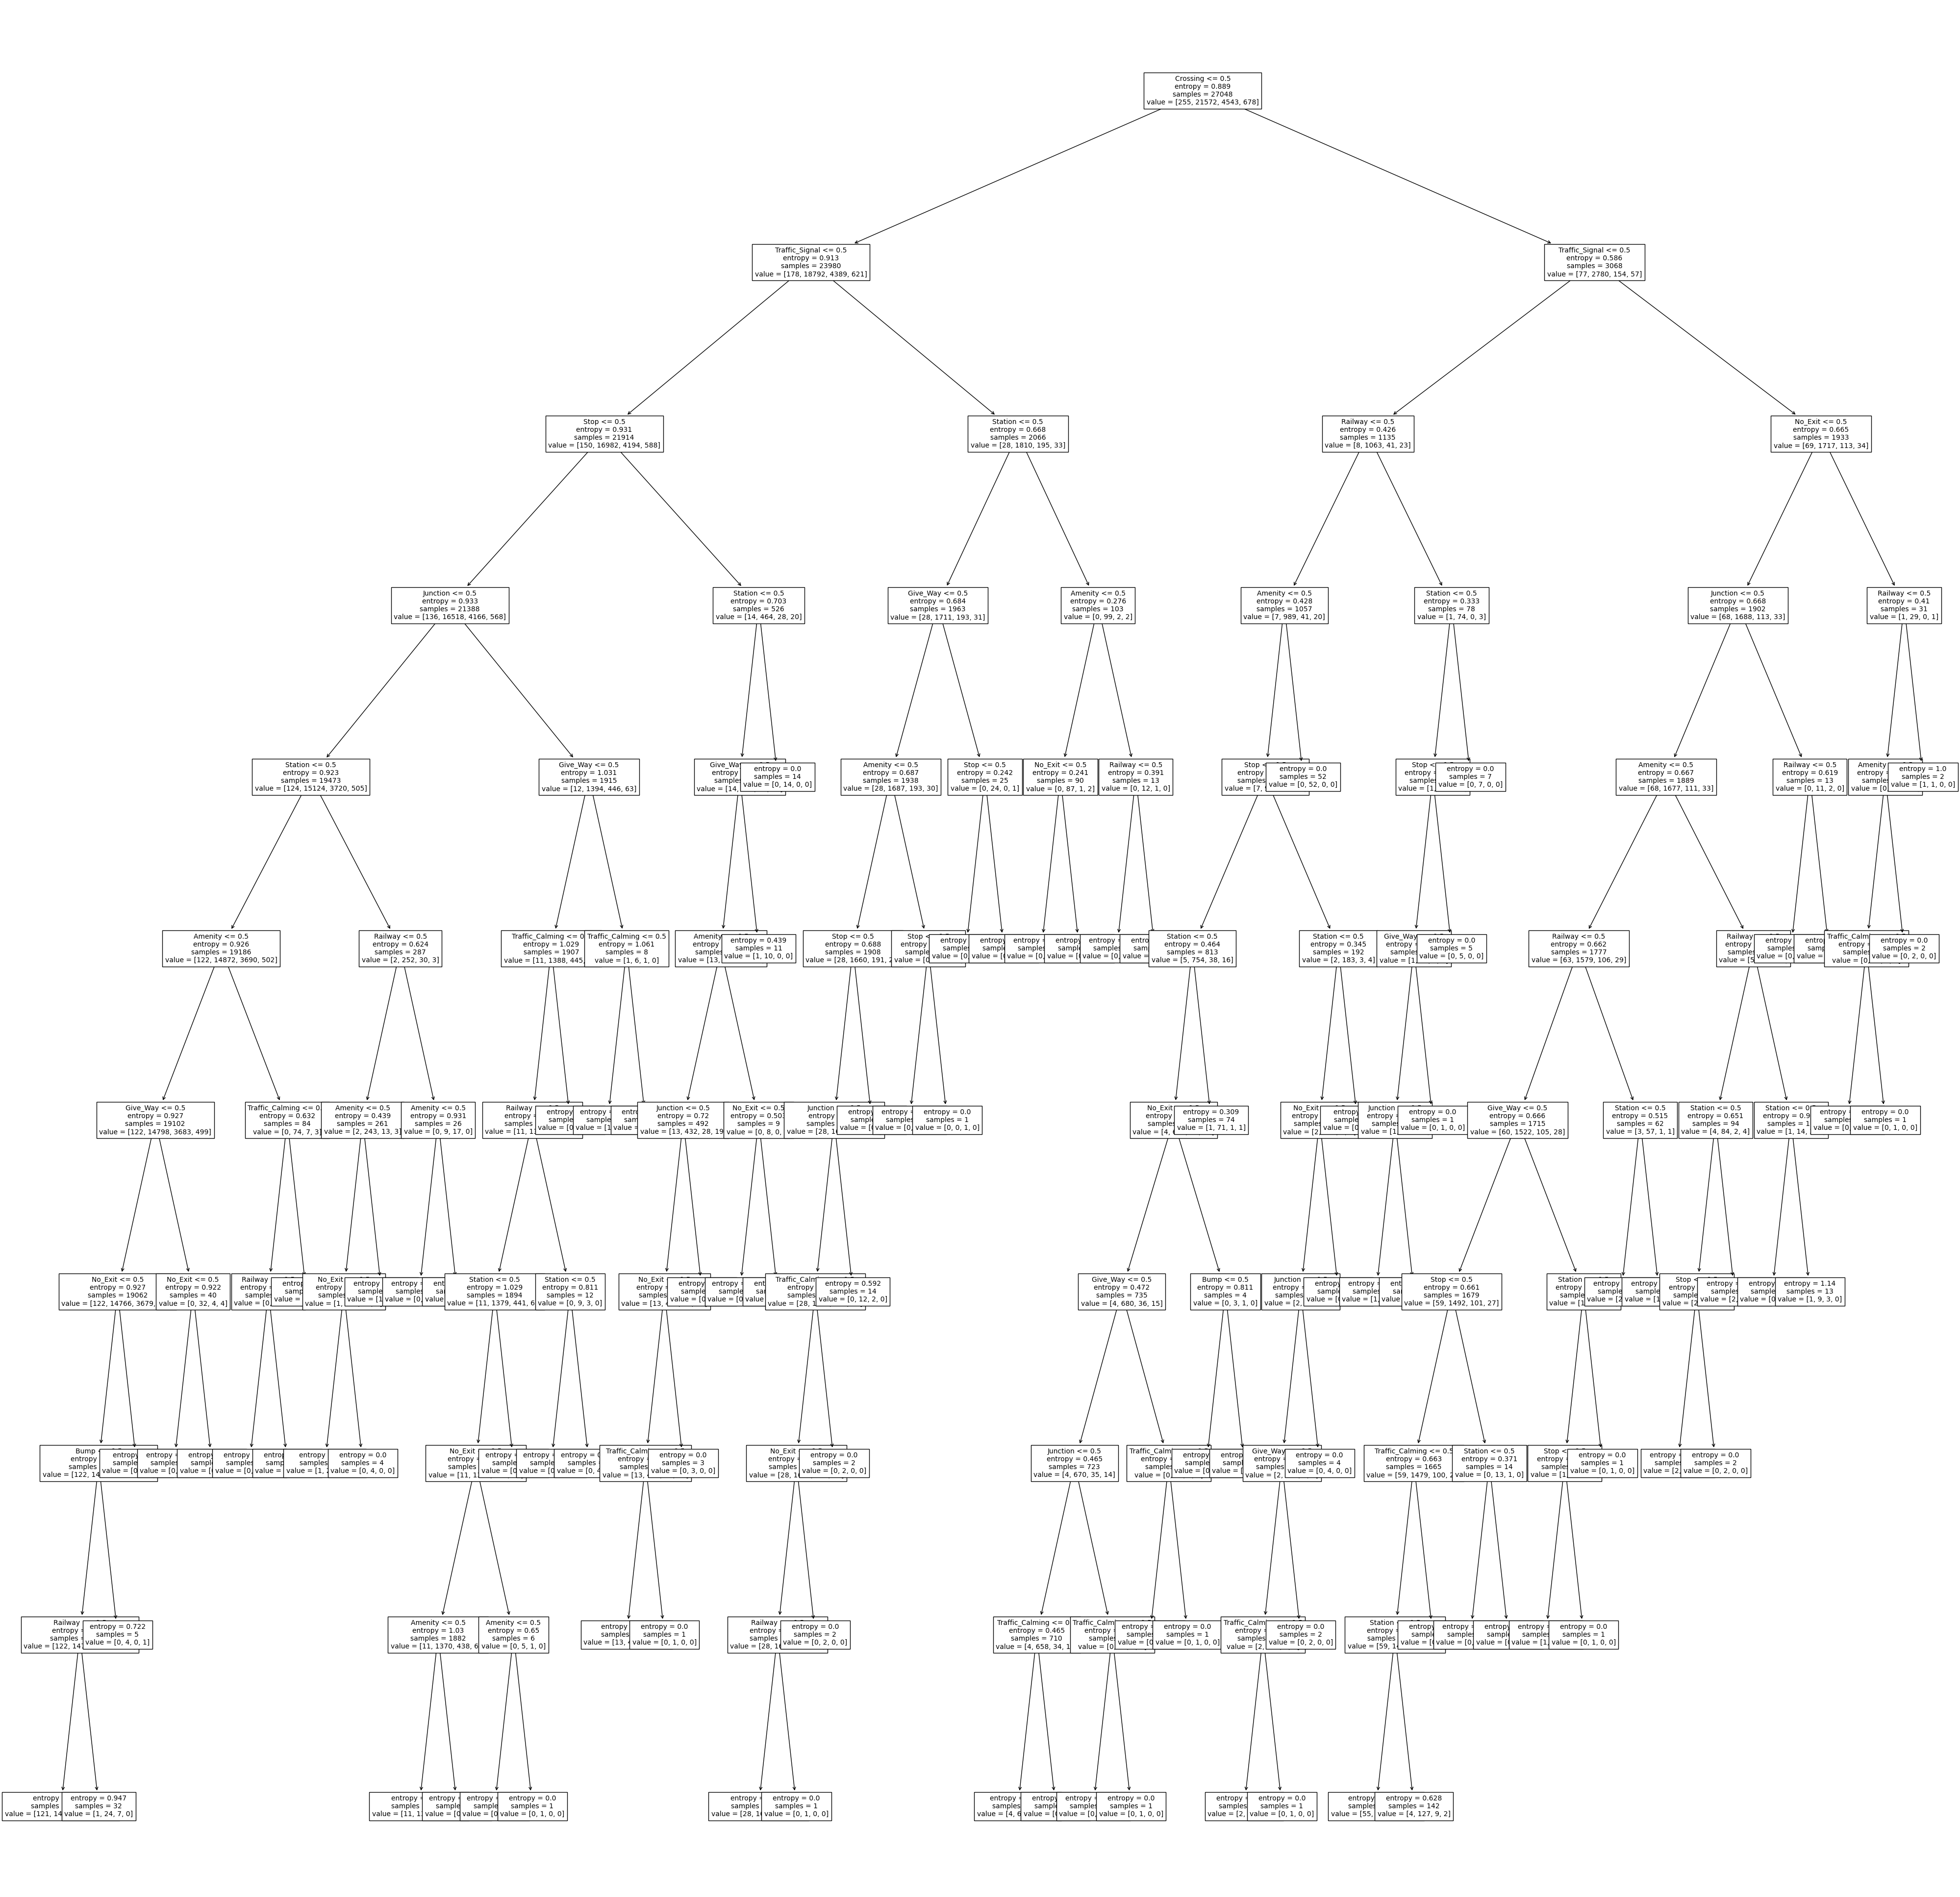

In [26]:
plt.figure(figsize=(50,50))
tree.plot_tree(dtc, feature_names=features, fontsize=10)
plt.show()

In [76]:
corr_matrix = workable.corr()
display(corr_matrix)

for x in corr_matrix:
    print(x, " has > .5 correlation with ")
    for y in corr_matrix[x]:
        #0 == 0
        if y > 0.5:
            print(y)
    print("========")
    print(" ")
    #display(corr_matrix[x])
    
print(corr_matrix["Severity"])



/tmp/ipykernel_136/3051757285.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = workable.corr()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.068269,0.078767,0.068282,0.078766,0.019592,-0.025936,-0.027481,0.039237,-0.051248,...,-0.001573,0.022159,0.000701,-0.005455,NaN,-0.017829,0.012948,-0.005693,-0.010138,NaN
Start_Lat,0.068269,1.000000,-0.143854,0.999995,-0.143831,0.080152,-0.487529,-0.491463,0.023514,-0.292726,...,0.022848,0.057084,-0.014331,0.001942,NaN,-0.107265,-0.010901,-0.007400,-0.050525,NaN
Start_Lng,0.078767,-0.143854,1.000000,-0.143847,0.999999,-0.009786,0.023875,0.010256,0.170168,0.248035,...,0.023391,-0.003501,0.009074,-0.017213,NaN,0.018436,-0.034848,-0.005698,0.048905,NaN
End_Lat,0.068282,0.999995,-0.143847,1.000000,-0.143824,0.080039,-0.487496,-0.491438,0.023470,-0.292775,...,0.022822,0.057058,-0.014358,0.001956,NaN,-0.107249,-0.010886,-0.007397,-0.050527,NaN
End_Lng,0.078766,-0.143831,0.999999,-0.143824,1.000000,-0.009630,0.023854,0.010233,0.170170,0.248010,...,0.023378,-0.003499,0.009074,-0.017233,NaN,0.018426,-0.034845,-0.005695,0.048895,NaN
Distance(mi),0.019592,0.080152,-0.009786,0.080039,-0.009630,1.000000,-0.057569,-0.063506,0.019289,-0.086904,...,-0.005936,0.045333,-0.010634,-0.013854,NaN,-0.065444,-0.043278,-0.009778,-0.112210,NaN
Temperature(F),-0.025936,-0.487529,0.023875,-0.487496,0.023854,-0.057569,1.000000,0.993585,-0.356628,0.198832,...,-0.034126,-0.042364,0.005964,-0.002558,NaN,0.063151,0.020716,0.007400,0.044172,NaN
Wind_Chill(F),-0.027481,-0.491463,0.010256,-0.491438,0.010233,-0.063506,0.993585,1.000000,-0.340081,0.210889,...,-0.035424,-0.041308,0.005961,-0.003597,NaN,0.063149,0.020708,0.007758,0.044914,NaN
Humidity(%),0.039237,0.023514,0.170168,0.023470,0.170170,0.019289,-0.356628,-0.340081,1.000000,0.114559,...,0.011718,0.022722,-0.001451,-0.003310,NaN,-0.017666,-0.031673,-0.002699,-0.032688,NaN
Pressure(in),-0.051248,-0.292726,0.248035,-0.292775,0.248010,-0.086904,0.198832,0.210889,0.114559,1.000000,...,0.000044,0.027233,0.002165,0.019506,NaN,0.053807,-0.017613,-0.000303,0.032273,NaN


Severity  has > .5 correlation with 
1.0
 
Start_Lat  has > .5 correlation with 
1.0
0.9999946132774844
 
Start_Lng  has > .5 correlation with 
1.0
0.9999988571734495
 
End_Lat  has > .5 correlation with 
0.9999946132774844
1.0
 
End_Lng  has > .5 correlation with 
0.9999988571734495
1.0
 
Distance(mi)  has > .5 correlation with 
1.0
 
Temperature(F)  has > .5 correlation with 
1.0
0.9935848693074373
 
Wind_Chill(F)  has > .5 correlation with 
0.9935848693074373
1.0
 
Humidity(%)  has > .5 correlation with 
1.0
 
Pressure(in)  has > .5 correlation with 
1.0
 
Visibility(mi)  has > .5 correlation with 
1.0
 
Wind_Speed(mph)  has > .5 correlation with 
1.0
 
Precipitation(in)  has > .5 correlation with 
1.0
 
Amenity  has > .5 correlation with 
1.0
 
Bump  has > .5 correlation with 
1.0
0.7498518393077025
 
Crossing  has > .5 correlation with 
1.0
 
Give_Way  has > .5 correlation with 
1.0
 
Junction  has > .5 correlation with 
1.0
 
No_Exit  has > .5 correlation with 
1.0
 
Railway  has

Text(0.5, 1.0, 'Box plots showing distance in miles an accident covers grouped by severity')

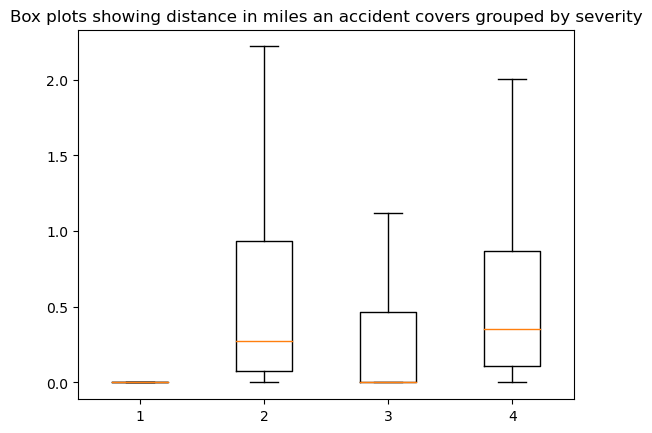

In [94]:
features_to_use = ["Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", "Amenity", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
features_to_use_numeric = ["Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
features_to_use_non_numeric = ["Amenity", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]

workable = workable.dropna()

fig, ax = plt.subplots()
#display(workable)
grouped_distance = workable.groupby("Severity")
#print(grouped_distance.get_group(1)["Distance(mi)"])
out = [grouped_distance.get_group(1)["Distance(mi)"], grouped_distance.get_group(2)["Distance(mi)"], grouped_distance.get_group(3)["Distance(mi)"], grouped_distance.get_group(4)["Distance(mi)"]]
ax.boxplot(out, 0, '')
ax.set_title("Box plots showing distance in miles an accident covers grouped by severity")

plotted  Distance(mi)
plotted  Temperature(F)
plotted  Humidity(%)
plotted  Pressure(in)
plotted  Visibility(mi)
plotted  Wind_Speed(mph)
plotted  Precipitation(in)


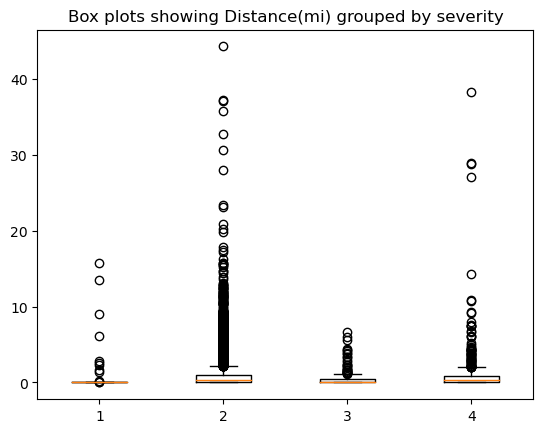

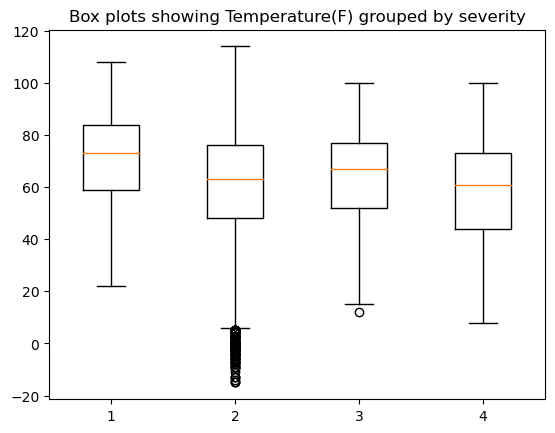

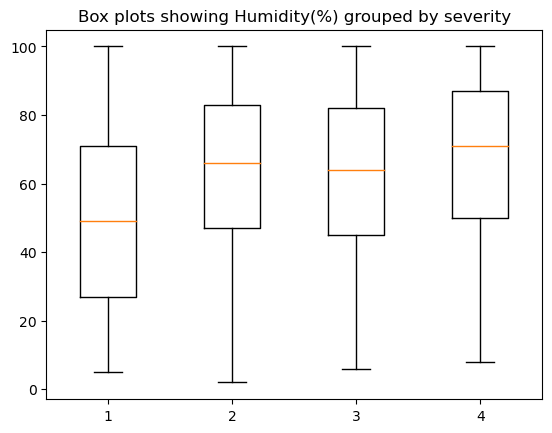

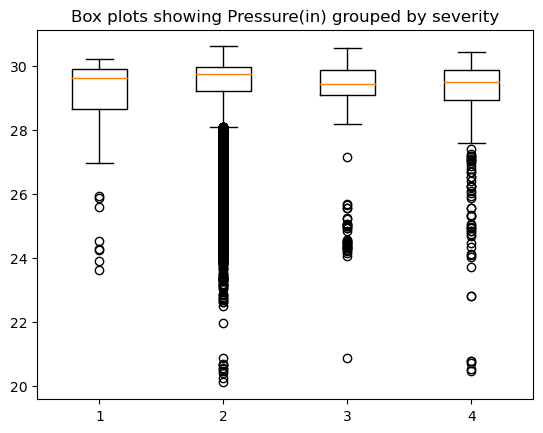

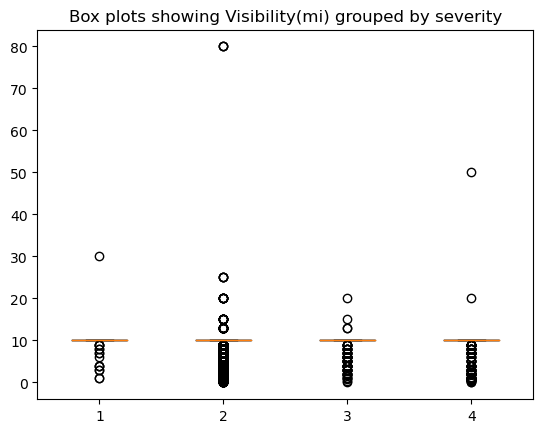

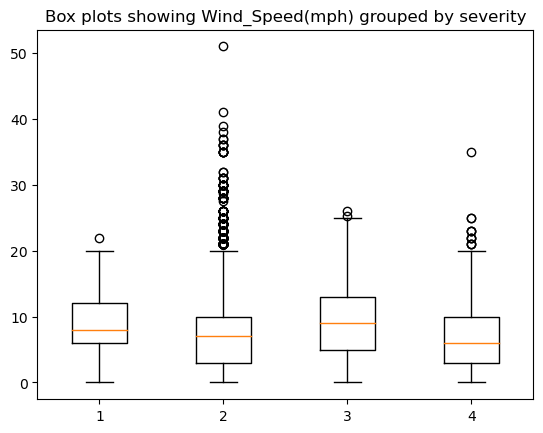

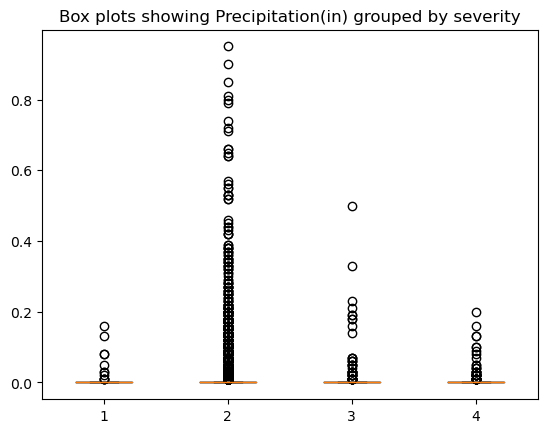

In [67]:
for x in features_to_use_numeric:
    fig, ax = plt.subplots()
    #display(workable)
    grouped_distance = workable.groupby("Severity")
    #print(grouped_distance.get_group(1)["Distance(mi)"])
    out = [grouped_distance.get_group(1)[x], grouped_distance.get_group(2)[x], grouped_distance.get_group(3)[x], grouped_distance.get_group(4)[x]]
    #print(out)
    ax.boxplot(out, 0)
    print("plotted ", x)
    ax.set_title("Box plots showing " + x + " grouped by severity")
    

In [30]:
X = workable[["Temperature(F)", "Humidity(%)"]]
#display(X)
Y = workable["Severity"]

print(len(X))
print(len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

17728
17728


In [38]:
rf_classifier = RandomForestClassifier(n_estimators=2)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [39]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy or other metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.922165820642978
Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.06      0.08        33
           2       0.94      0.98      0.96      3330
           3       0.13      0.03      0.05        69
           4       0.00      0.00      0.00       114

    accuracy                           0.92      3546
   macro avg       0.30      0.27      0.27      3546
weighted avg       0.89      0.92      0.90      3546



In [40]:
X = workable[["Amenity", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]]
Y = workable["Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [43]:
rf_classifier = RandomForestClassifier(n_estimators=12)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=12)

In [44]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy or other metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9393683023124647
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.94      1.00      0.97      3331
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00       114

    accuracy                           0.94      3546
   macro avg       0.23      0.25      0.24      3546
weighted avg       0.88      0.94      0.91      3546



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(workable[["Temperature(F)", "Humidity(%)"]], workable["Severity"])
#tree.plot_tree(clf)

In [54]:
workable = workable.dropna()

X = workable[features_to_use]
Y = workable["Severity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels: 'linear', 'rbf', 'poly', etc.

# Train the model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [172]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9402143260011281
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           2       0.94      1.00      0.97      3334
           3       0.00      0.00      0.00        71
           4       0.00      0.00      0.00       112

    accuracy                           0.94      3546
   macro avg       0.24      0.25      0.24      3546
weighted avg       0.88      0.94      0.91      3546



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
X = workable[features_to_use]
Y = workable["Severity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [182]:
# Initialize the Multi-Layer Perceptron Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 10) activation='relu', solver='adam')

# Train the model
mlp_classifier.fit(X_train, y_train)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1780352526.py, line 2)

In [183]:
# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9464184997179921
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.22      0.35        27
           2       0.95      1.00      0.97      3348
           3       0.25      0.01      0.03        76
           4       0.75      0.06      0.12        95

    accuracy                           0.95      3546
   macro avg       0.70      0.32      0.37      3546
weighted avg       0.93      0.95      0.92      3546



In [78]:
#temp = ["Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", "Amenity", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
#pressure, humidity, and pedestrian corssings.Junctions, wind chill, and temperature seam to be somewhat meaningful too. 
temp = ["Pressure(in)", "Humidity(%)", "Crossing", "Junction", "Wind_Chill(F)", "Temperature(F)"]

X = workable[temp]
Y = workable["Severity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Multi-Layer Perceptron Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam')

# Train the model
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("end " + x + " =======================")
print(" ")


Accuracy: 0.9404963338973491
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.07      0.12        29
           2       0.94      1.00      0.97      3334
           3       0.00      0.00      0.00        71
           4       0.00      0.00      0.00       112

    accuracy                           0.94      3546
   macro avg       0.40      0.27      0.27      3546
weighted avg       0.89      0.94      0.91      3546

end Turning_Loop =======================
 


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
severity1 = grouped_distance.get_group(1)
severity2 = grouped_distance.get_group(2)
severity3 = grouped_distance.get_group(3)
severity4 = grouped_distance.get_group(4)

split_by_severity = [severity1, severity2, severity3, severity4]

In [116]:
#features_to_use_non_numeric


for x in split_by_severity:
    print(" ")
    print("Start new severity Level")

    for y in features_to_use_non_numeric:
        #print(x[y].value_counts())
        
        if (len(x[y].value_counts()) == 1):
            print("All false for ", y)
        else:
            print("For ", y, " : ",  x[y].value_counts()[1] / (x[y].value_counts()[0] + x[y].value_counts()[1]))
        

        

    #failed attempt at a feature to coralation
    #display(x)
    #temp = x.corr()
    #display(temp)
        

 
Start new severity Level
For  Amenity  :  0.04697986577181208
For  Crossing  :  0.4429530201342282
For  Give_Way  :  0.006711409395973154
For  Junction  :  0.087248322147651
For  No_Exit  :  0.013422818791946308
For  Railway  :  0.03355704697986577
All false for  Roundabout
For  Station  :  0.0738255033557047
For  Stop  :  0.020134228187919462
All false for  Traffic_Calming
For  Traffic_Signal  :  0.48322147651006714
All false for  Turning_Loop
 
Start new severity Level
For  Amenity  :  0.011027208438211674
For  Crossing  :  0.09145391346038595
For  Give_Way  :  0.00365575931918974
For  Junction  :  0.07149706340644851
For  No_Exit  :  0.0020376363418434617
For  Railway  :  0.007850892964161573
All false for  Roundabout
For  Station  :  0.029425865995445284
For  Stop  :  0.023372887450557354
For  Traffic_Calming  :  0.0009588876902792761
For  Traffic_Signal  :  0.0862399616444924
All false for  Turning_Loop
 
Start new severity Level
For  Amenity  :  0.00804289544235925
For  Crossin

In [156]:
def data_to_day(stri):
    s = stri[0:19]
    date_obj = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')

    # Get the day of the week (0 for Monday, 6 for Sunday)
    day_of_week = date_obj.weekday()

    # Convert the numerical representation of the day to the actual day name
    day_name = date_obj.strftime('%A')
    return day_name
    #print(f"The day of the week for {s} is {day_name}.")

In [173]:

workable["Day"] = workable["Start_Time"].apply(data_to_day)

display(workable["Day"])

print(workable["Day"].value_counts())

120623    Wednesday
149997     Thursday
157520    Wednesday
167747       Monday
157120      Tuesday
            ...    
118261      Tuesday
121849    Wednesday
171664      Tuesday
172637     Thursday
116066     Thursday
Name: Day, Length: 17728, dtype: object

Friday       3035
Thursday     2910
Wednesday    2736
Tuesday      2717
Monday       2531
Saturday     2112
Sunday       1687
Name: Day, dtype: int64


AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

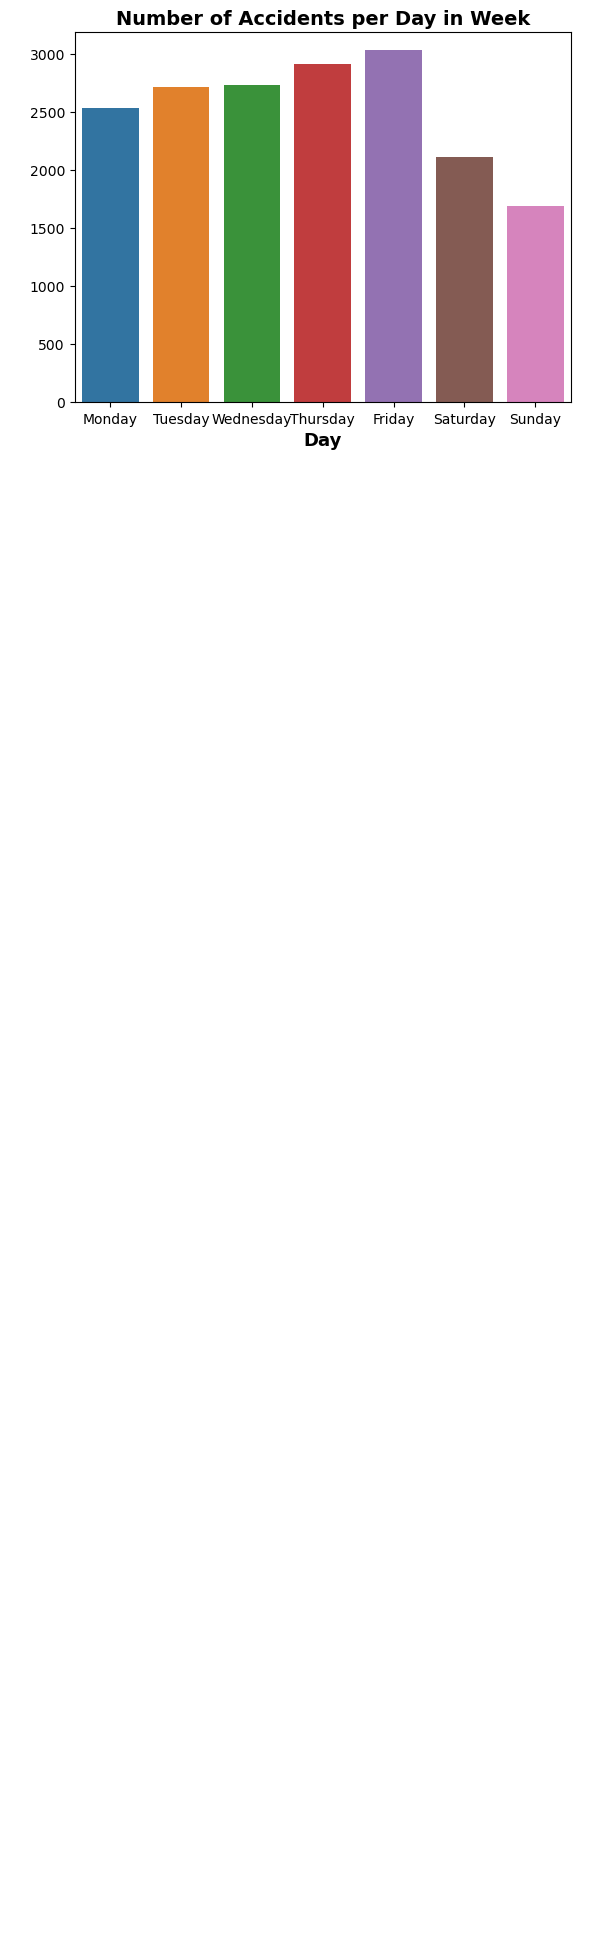

In [176]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=workable["Day"], order=order)

# Calculate the total counts
total_counts = workable["Day"].value_counts()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents per Day in Week", fontsize=14, fontweight="bold")

ax = plt.gca()

for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]]/total_counts.sum()) * 100
    ax.text(
        bar.get_x(),  
        bar.get_height()-15000,  
        f'{proportion:.2f}%',
        fontsize=15,
        weight='bold',
        color='white'
    )
plt.save("test.png")
plt.show()
